In [1]:
#First import necessary modules for the project
import pandas as pd
import numpy as np
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv", sep = ',')
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [3]:
#getting idea of the range of monthly income.
attritionAndIncome = data[['Attrition', 'MonthlyIncome']].sort_values(by=['MonthlyIncome'])

#number of bins is chosen to be 29
attritionAndIncome['binning'] = pd.cut(attritionAndIncome['MonthlyIncome'], bins=29)
attritionAndIncome

,Attrition,MonthlyIncome,binning
513,Yes,1009,"(990.01, 1663.828]"
727,No,1051,"(990.01, 1663.828]"
764,No,1052,"(990.01, 1663.828]"
1338,Yes,1081,"(990.01, 1663.828]"
1365,Yes,1091,"(990.01, 1663.828]"
...,...,...,...
568,Yes,19859,"(19344.172, 19999.0]"
165,No,19926,"(19344.172, 19999.0]"
851,No,19943,"(19344.172, 19999.0]"
746,No,19973,"(19344.172, 19999.0]"


In [4]:
OnlyYesIncome = attritionAndIncome[attritionAndIncome["Attrition"].str.match('Yes')]
yesIncomeSorted= OnlyYesIncome.groupby(by =['binning']).size().reset_index()
OnlyNoIncome = attritionAndIncome[attritionAndIncome["Attrition"].str.match('No')]
NoIncomeSorted= OnlyNoIncome.groupby(by =['binning']).size().reset_index()


In [5]:
newDataIncome = pd.merge(yesIncomeSorted, NoIncomeSorted, on = 'binning').rename(columns={"0_x": "Yes", "0_y":"No"})
newDataIncome

,binning,Yes,No
0,"(990.01, 1663.828]",13,12
1,"(1663.828, 2318.655]",33,90
2,"(2318.655, 2973.483]",67,171
3,"(2973.483, 3628.31]",15,88
4,"(3628.31, 4283.138]",15,95
5,"(4283.138, 4937.966]",17,122
6,"(4937.966, 5592.793]",12,113
7,"(5592.793, 6247.621]",11,68
8,"(6247.621, 6902.448]",7,81
9,"(6902.448, 7557.276]",4,29


In [6]:
def getRatioYN(row):
    return row['Yes']/ row['No']
newDataIncome['Yes_No_Ratio'] = newDataIncome.apply(getRatioYN, axis =1)

In [7]:
def printmd(string):
    display(Markdown(string))
    
printmd('Lower the yes_no_ratio lower the attrition is. So, employee with very lowest salary has the highest attrition')
newDataIncome.sort_values(by = 'Yes_No_Ratio')


Lower the yes_no_ratio lower the attrition is. So, employee with very lowest salary has the highest attrition

,binning,Yes,No,Yes_No_Ratio
22,"(15415.207, 16070.034]",0,7,0.000000
26,"(18034.517, 18689.345]",0,11,0.000000
25,"(17379.69, 18034.517]",0,16,0.000000
20,"(14105.552, 14760.379]",0,6,0.000000
23,"(16070.034, 16724.862]",0,15,0.000000
24,"(16724.862, 17379.69]",0,23,0.000000
21,"(14760.379, 15415.207]",0,5,0.000000
15,"(10831.414, 11486.241]",1,19,0.052632
16,"(11486.241, 12141.069]",1,15,0.066667
27,"(18689.345, 19344.172]",2,27,0.074074


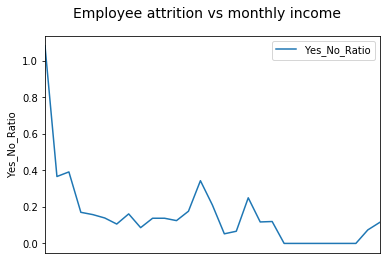

In [30]:
newDataIncome.plot(x = "binning", y = "Yes_No_Ratio")
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

plt.xlabel('Incomes')
plt.ylabel('Yes_No_Ratio')
plt.suptitle('Employee attrition vs monthly income', fontsize=14)
plt.savefig('salaryvsAttrition.png')
plt.show()


In [9]:
attritionAndDistance = data[['Attrition', 'DistanceFromHome']].sort_values(by=['DistanceFromHome'])
attritionAndDistance['binning'] = pd.cut(attritionAndDistance['DistanceFromHome'], bins=14)

In [10]:
OnlyYes = attritionAndDistance[attritionAndDistance["Attrition"].str.match('Yes')]
yesSorted= OnlyYes.groupby(by =['binning']).size().reset_index()
OnlyNo = attritionAndDistance[attritionAndDistance["Attrition"].str.match('No')]
noSorted = OnlyNo.groupby(by =['binning']).size().reset_index()

In [11]:
newDataDistance = pd.merge(yesSorted, noSorted, on = 'binning').rename(columns={"0_x": "Yes", "0_y":"No"})

In [12]:
def getRatio(row):
    return row['No']/ row['Yes']
newDataDistance['No_Yes_Ratio'] = newDataDistance.apply(getRatio, axis =1)

In [13]:
printmd('This shows higher the ratio, lower the attrition is. We can see the close distance once has the lower attrition. Also, the mean distances has higher attrition')
newDataDistance.sort_values(by = 'No_Yes_Ratio')

This shows higher the ratio, lower the attrition is. We can see the close distance once has the lower attrition. Also, the mean distances has higher attrition

,binning,Yes,No,No_Yes_Ratio
11,"(23.0, 25.0]",18,35,1.944444
5,"(11.0, 13.0]",12,27,2.250000
10,"(21.0, 23.0]",11,35,3.181818
7,"(15.0, 17.0]",12,40,3.333333
6,"(13.0, 15.0]",9,38,4.222222
3,"(7.0, 9.0]",28,137,4.892857
9,"(19.0, 21.0]",7,36,5.142857
12,"(25.0, 27.0]",6,31,5.166667
1,"(3.0, 5.0]",19,110,5.789474
8,"(17.0, 19.0]",7,41,5.857143


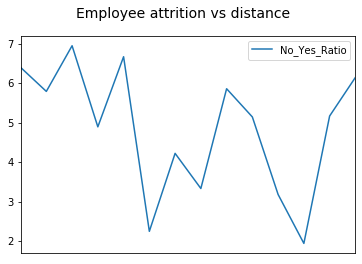

In [14]:
newDataDistance.plot(x = "binning", y = "No_Yes_Ratio")
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

plt.suptitle('Employee attrition vs distance', fontsize=14)
plt.show()

In [15]:
#import the csv file and change the Attrition from Yes or No to 0 or 1 and split the data for train and test purpose

data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv", sep = ',')
data['Attrition'] = data['Attrition'].map({'Yes':0 ,'No':1})
train, test = train_test_split(data, test_size=0.2)

In [16]:
test

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
921,28,1,Travel_Frequently,791,Research & Development,1,4,Medical,1,1286,...,3,80,0,5,2,2,4,2,0,2
843,26,1,Travel_Rarely,1384,Research & Development,3,4,Medical,1,1177,...,2,80,1,8,2,3,8,7,0,7
1227,31,1,Travel_Rarely,741,Research & Development,2,4,Life Sciences,1,1721,...,4,80,1,6,2,4,5,2,0,3
833,27,1,Travel_Rarely,199,Research & Development,6,3,Life Sciences,1,1162,...,3,80,1,4,0,3,4,2,2,2
94,32,1,Travel_Rarely,1093,Sales,6,4,Medical,1,125,...,1,80,0,12,0,3,11,8,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,32,1,Travel_Rarely,1018,Research & Development,2,4,Medical,1,439,...,3,80,0,10,0,2,7,7,0,7
862,44,1,Non-Travel,111,Research & Development,17,3,Life Sciences,1,1206,...,4,80,0,6,3,3,0,0,0,0
58,31,1,Travel_Rarely,655,Research & Development,7,4,Life Sciences,1,76,...,4,80,1,10,3,2,7,7,1,7
339,27,1,Travel_Rarely,1130,Sales,8,4,Marketing,1,458,...,1,80,1,8,3,3,8,7,0,7


In [17]:
train_features = train.copy()
train_labels = train_features.pop('Attrition')

test_features = test.copy()
test_labels = test_features.pop('Attrition')
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)


In [18]:
inputs = {}

for name, column in train_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32
    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'Age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Age')>,
 'BusinessTravel': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'BusinessTravel')>,
 'DailyRate': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'DailyRate')>,
 'Department': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Department')>,
 'DistanceFromHome': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'DistanceFromHome')>,
 'Education': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Education')>,
 'EducationField': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'EducationField')>,
 'EmployeeCount': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'EmployeeCount')>,
 'EmployeeNumber': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'EmployeeNumber')>,
 'EnvironmentSatisfaction': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'EnvironmentSatisfaction')>,
 'Gender': <KerasTensor

In [19]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = preprocessing.Normalization()
norm.adapt(np.array(train[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 26) dtype=float32 (created by layer 'normalization')>

In [20]:
preprocessed_inputs = [all_numeric_inputs]

In [21]:
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue
    lookup = preprocessing.StringLookup(vocabulary=np.unique(train_features[name]))
    one_hot = preprocessing.CategoryEncoding(max_tokens=lookup.vocab_size())
    x = lookup(input)
    x = one_hot(x)
    preprocessed_inputs.append(x)

In [22]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)
train_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

In [23]:
train_features_dict = {name: np.array(value) for name, value in train_features.items()}
test_features_dict = {name: np.array(value) for name, value in test_features.items()}
features_dict = {name:values[:1] for name, values in train_features_dict.items()}
train_preprocessing(features_dict)

<tf.Tensor: shape=(1, 71), dtype=float32, numpy=
array([[-1.513, -0.377, -0.029, -1.874,  0.   , -0.449, -0.64 , -1.424,
         0.383, -0.972, -1.551, -0.856, -1.404, -0.686, -0.329, -0.431,
         1.202,  0.   ,  0.24 , -0.817, -0.66 ,  1.778, -0.496, -0.341,
        -0.676, -0.598,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  1.   ,  0.   ]],
      dtype=float32)>

In [24]:
def data_model(preprocessing_head, inputs):
    body = tf.keras.Sequential([
        layers.Dense(64),
        layers.Dense(1)
    ])
    preprocessed_inputs = preprocessing_head(inputs)
    result = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, result)
    model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
    return model

data_model = data_model(train_preprocessing, inputs)

In [25]:
data_model.fit(x=train_features_dict, y=train_labels, epochs=5)

Epoch 1/5
37/37 [==============================] - 1s 3ms/step - loss: 0.6788 - accuracy: 0.4956
Epoch 2/5
37/37 [==============================] - 0s 4ms/step - loss: 0.4023 - accuracy: 0.8513
Epoch 3/5
37/37 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 0.8711
Epoch 4/5
37/37 [==============================] - 0s 5ms/step - loss: 0.3285 - accuracy: 0.8773
Epoch 5/5
37/37 [==============================] - 0s 4ms/step - loss: 0.3313 - accuracy: 0.8784


In [26]:
print("Evaluate on test data")
loss, accuracy= data_model.evaluate(test_features_dict, test_labels)
print("test loss :", loss)
print("test accuracy: ", accuracy)

Evaluate on test data
10/10 [==============================] - 1s 7ms/step - loss: 0.2895 - accuracy: 0.8810
test loss : 0.2895292043685913
test accuracy:  0.8809523582458496


In [43]:
#Here Positive number denotes 
print("Predict on test data")
x = data_model.predict(test_features_dict)
x[160:190]

Predict on test data


array([[ 2.181],
       [ 3.209],
       [ 1.858],
       [ 5.511],
       [ 2.885],
       [ 3.459],
       [ 1.438],
       [ 0.643],
       [ 3.902],
       [ 1.443],
       [ 1.439],
       [ 1.145],
       [ 0.929],
       [ 2.549],
       [ 3.972],
       [-0.262],
       [ 1.153],
       [ 3.937],
       [ 2.04 ],
       [-1.686],
       [ 3.565],
       [ 3.841],
       [ 1.805],
       [ 1.968],
       [ 2.259],
       [ 1.924],
       [ 1.77 ],
       [ 2.378],
       [ 2.314],
       [ 4.055]], dtype=float32)

In [42]:
test_labels[160:190]

166     1
208     1
1219    1
190     1
377     1
1439    1
383     1
79      1
877     1
512     1
990     1
172     1
296     0
515     1
1161    1
182     0
245     1
506     1
1341    1
26      0
403     1
523     1
1074    1
353     1
1382    1
742     1
1073    1
307     1
330     1
219     1
Name: Attrition, dtype: int64